<a href="https://colab.research.google.com/github/nagpureyogesh/capstone-2/blob/main/Capstone_YesBank_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Yes Bank Stock Closing Price Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**Shubham Ashokrao Lawate
##### **Team Member 2 -**Yogesh Suresh Nagpure
##### **Team Member 3 -**Ashish Sunil Mahure

# **Project Summary -**

# **GitHub Link -**

### **PROBLEM STATEMENT**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly

stock prices of the bank since its inception and includes closing, starting, highest, and lowest

stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# ***Let's Begin !***

##**Know your data**

###**Import Libraries**

In [ ]:
#here we have imported the required libraries as per our requirements.

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

### **importing dataset**

In [ ]:
#importing the data 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Capstone 2/data_YesBank_StockPrices.csv")

always make the copy of original data ,it will helps to unchange the orginal dataset

In [ ]:
df_data=df.copy()

## **DATA EXPLORATION**

In [ ]:
df_data.shape

(185, 5)

**We have Yes Bank monthly stock price dataset. It has following features (Column)**:

 **1) Open** : Opening price of the stock of particular day

 **2) High** : It's the highest price at which a stock traded during a period

 **3) Low** : It's the lowest price at which stock traded during a period

 **4) Close** : Closing price of a stock at the end of a Trading Day

**5) Date** : In our data its monthly observation of stock since it listed

In [ ]:
df_data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df_data.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
#details of given data set
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
df_data.describe(include="all")

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


#data cleaning

In [ ]:
df_data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

here we have observed that there is no null value in our dataset 

#Check for outlier


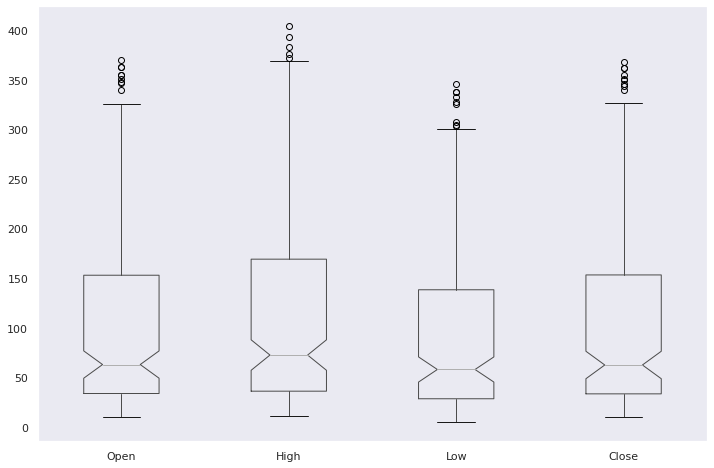

In [ ]:
fig = plt.figure(figsize =(12, 8))
boxplot = df_data.boxplot(column=['Open','High','Low',"Close"],grid=False,notch=True)
 
plt.show()

As above boxplot shows outliers this is because of stock price fall from nearly around 400 to 20.This happen quick within very few months thats why top value of stocks looks like outliers.

# convert string object to datetime object

In [ ]:
from datetime import datetime

df_data['Date'] = df_data['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

# Check the datatype of the columns after changing datatype of date

In [ ]:
df_data.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

here all the datatypes are same so there is no need to change any of them.

Now your dataset is ready for EDA.

#**Exploratory data analysis**

1. **Yes bank Closing Price**

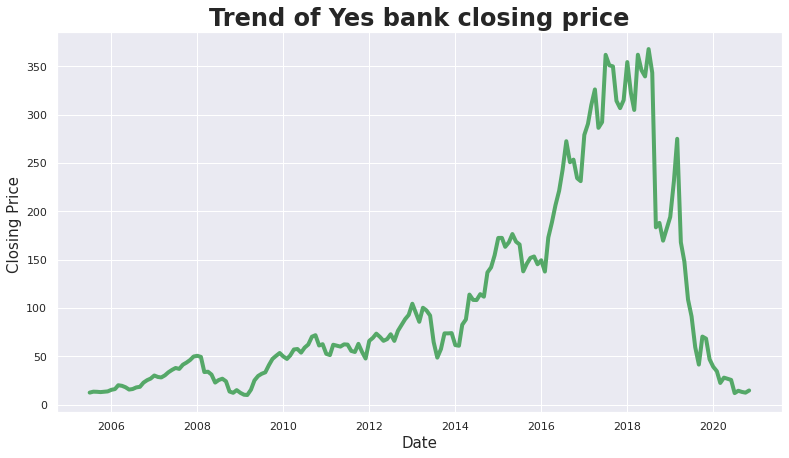

In [ ]:
plt.figure(figsize = (13,7))
plt.grid(True)
plt.title('Trend of Yes bank closing price',fontweight = 'bold',fontsize=24)
plt.plot(df_data['Date'],df_data['Close'],color='g',linewidth=4)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Closing Price ',fontsize = 15)
plt.show()

Here from 2016 to 2018 there is gradually increase in stock price but after 2018 it is observed that there is fall in stock price and this drastically happen change is because of Rana kapoor fraud case which affected the price of yes bank stocks.

2. **Yes Bank Opening Price**

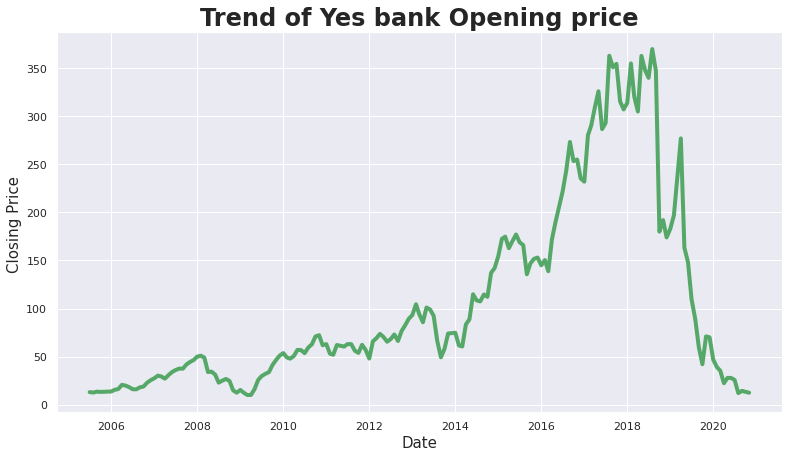

In [ ]:
plt.figure(figsize = (13,7))
plt.grid(True)
plt.title('Trend of Yes bank Opening price',fontweight = 'bold',fontsize=24)
plt.plot(df_data['Date'],df_data['Open'],color='g',linewidth=4)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Closing Price ',fontsize = 15)
plt.show()

Here also the opening price also affected because of fraud , before that the opening day price increases continuously till 2018.
We can take closing price of the stock as the dependent variable as it is the final price of the day.

# **Distribution of dependent variable Close Price .**

In [ ]:
# Independent Variables
indep_var=df_data[['High','Low','Open']]
#dependent variable
dep_var=df_data['Close']

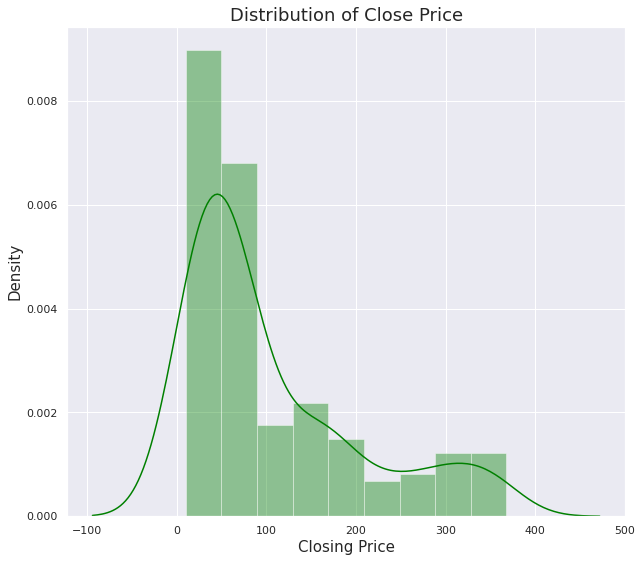

In [ ]:
# DEPENDENT VARIABLE

plt.figure(figsize=(10,9))
sns.distplot(df_data['Close'],color='green')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

The distribution is rightly skewed distribution. It may lead us to misleading results in view of statistical hyposthesis. It can be corrected by applying Log Transformation then we'll have a look how this data behave.

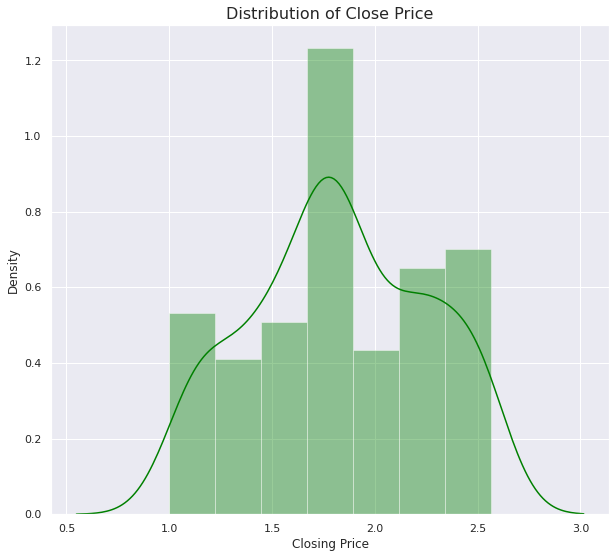

In [ ]:
plt.figure(figsize=(10,9))
sns.distplot(np.log10(df_data['Close']),color='green') #here we use log10 transformation 
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

###  **DISTRIBUTION WITH INDEPENDENT VARIABLE**

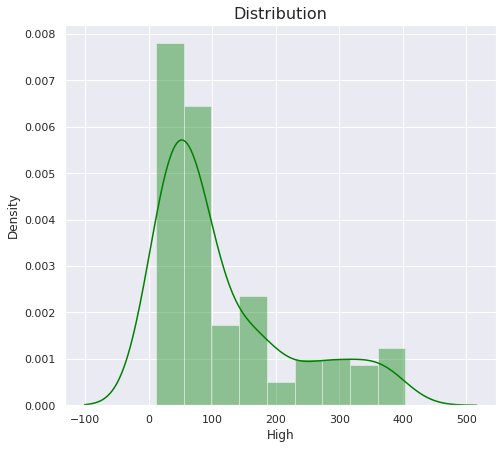

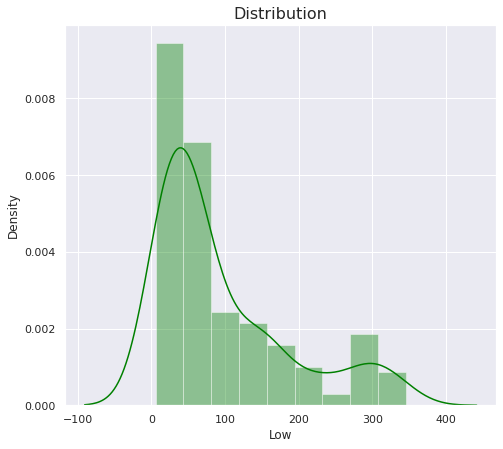

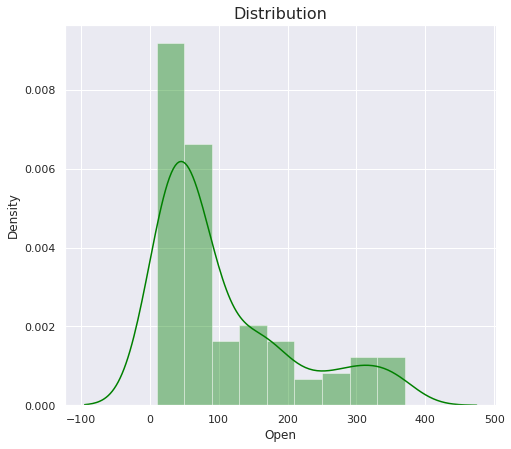

In [ ]:
# INDEPENDENT VARIABLES

for var in indep_var:
    plt.figure(figsize=(17,7))
    sns.set()
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df_data[var],color='green')
    fig.set_title("Distribution", fontsize=16)
    fig.set_ylabel('Density')
    fig.set_xlabel(var)

1. Here it is observed that all features are rightly skewed.
2. For that we need to apply log transformation again to make it normally distribution.

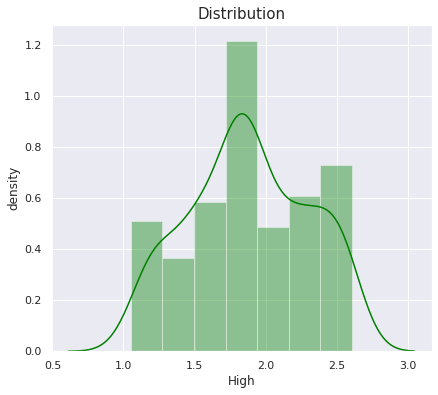

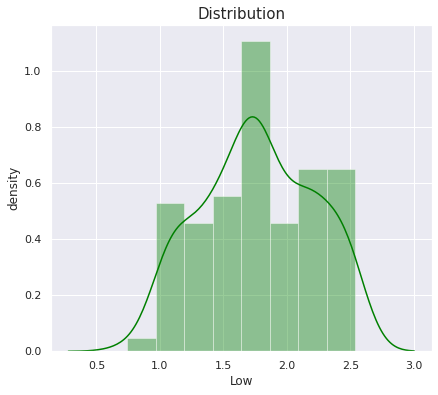

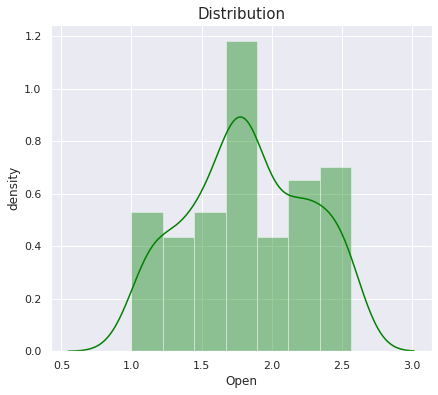

In [ ]:
#applying log transformation
for var in indep_var:
    plt.figure(figsize=(15,6))
    sns.set()
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df_data[var]),color ='green')
    fig.set_title("Distribution",fontsize=15)
    fig.set_ylabel('density')
    fig.set_xlabel(var)

now the data normally distributed 

# **Next is to check the correlation with Independent Variable**


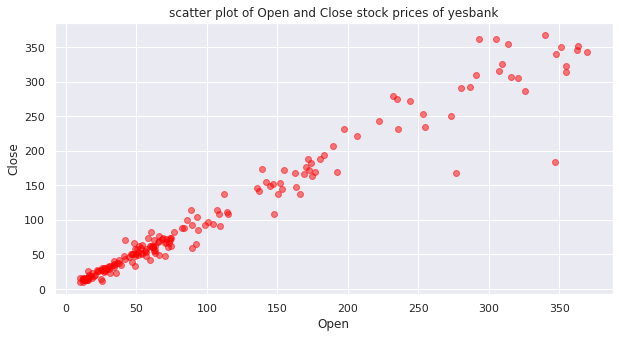

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.scatter(df_data['Open'],df_data['Close'],alpha = 0.5,color="red")
plt.title('scatter plot of Open and Close stock prices of yesbank')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

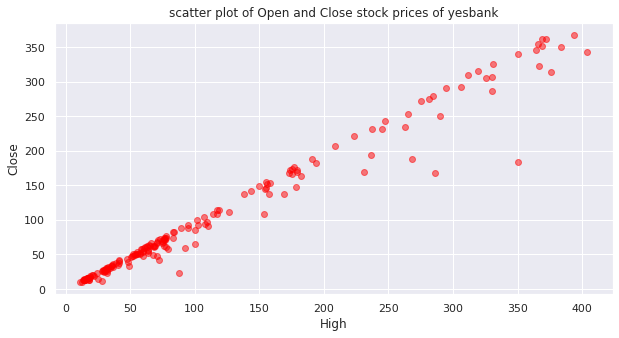

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.scatter(df_data['High'],df_data['Close'],alpha = 0.5,color="red")
plt.title('scatter plot of Open and Close stock prices of yesbank')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

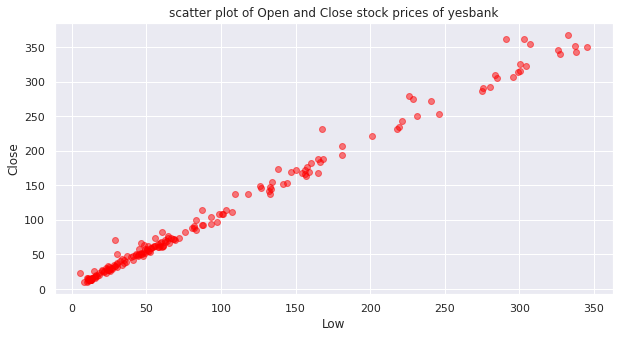

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.scatter(df_data['Low'],df_data['Close'],alpha = 0.5,color="red")
plt.title('scatter plot of Open and Close stock prices of yesbank')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()

Here it is observed that independent features are correlated with closing price.

# here we have check correlation using heatmap. 

<Axes: >

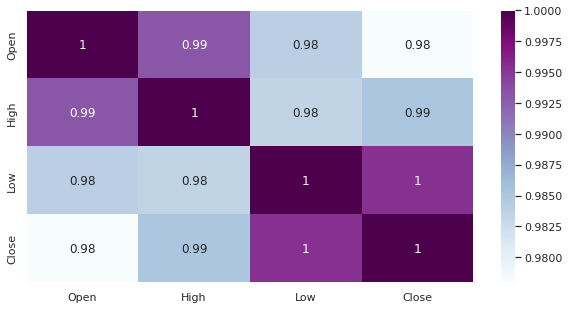

In [ ]:
#Lets find correlation with heatmap
plt.figure(figsize=(10,5))
correlation = df_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='BuPu')


Here it is observed that there is high correlation between independent variables which cause multicollinearity. High multicollinearity is not good for fitting model and prediction because a slight change in any independent variable will give very unpredictable results.

# Checking Multicollinearity

To check multicollinearity , we have to calculate Variation Inflation Factor(VIF)

A **variance inflation factor (VIF)** is a measure of the amount of multicollinearity in regression analysis. A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

In [ ]:
#Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

vif(df_data[[i for i in df_data.describe().columns if i not in ['Date', 'Close']]])


,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [ ]:
#Checking VIF without Date and Open features
vif(df_data[[i for i in df.describe().columns if i not in ['Date','Open', 'Close']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


In [ ]:
#Checking VIF without Date and High features
vif(df_data[[i for i in df.describe().columns if i not in ['Date','High', 'Close']]])

,variables,VIF
0,Open,65.64384
1,Low,65.64384


In [ ]:
#Checking VIF without Date and Low features
vif(df_data[[i for i in df.describe().columns if i not in ['Date','Low', 'Close']]])

,variables,VIF
0,Open,153.215921
1,High,153.215921


1. Since we have checked VIF with dropping each features(Open,High & Low) one by
one,better result of VIF was when we dropped 'Open' which was also realtively high.

2. Even dropping any one feature the VIF was high. This is because of all features are highly correlated and they are equally important for closing price prediction so we are not going to dropp any column.

3. As we have limited features, dropping any one of them will result in loss of important data which are essential for accurate model prediction and it will result in bad model.

4. Finally we will not dropp any column and will try to predict result and will see how model is performing with multicollinearity.

# Data **Transformation**

**splitting data**

1. The train_test_split() method is used to split our data into train and test sets.

2. Train set: The training dataset is a set of data that was utilized to fit the model. The dataset on which the model is trained. This data is seen and learned by the model.

3. Test set: The test dataset is a subset of the training dataset that is utilized to give an accurate evaluation of a final model fit.

X = Independent variable

Y = Dependent variable

In [ ]:

X = df_data.drop(columns=['Close','Date'])
y = df_data['Close']

Data must be normally distributed before apply normalization.

**Normalization** - Normalization is one of the feature scaling techniques. We particularly apply normalization when the data is skewed on the either axis i.e. when the data does not follow the gaussian distribution.In normalization, we convert the data features of different scales to a common scale which further makes it easy for the data to be processed for modeling. Thus, all the data features(variables) tend to have a similar impact on the modeling portion.

In [ ]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

In [ ]:
#Creating Trainig and Testing set of our dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#to check the shape of training Datasets.
X_train.shape

(148, 3)

In [ ]:
#to check the shape of test Dataset.
X_test.shape


(37, 3)

# **1.Linear Regression**
 It's a supervised learning algorithm and the simplest form of regression used to study the mathematical relationship between variables.

In [ ]:
#first import linear regression 
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg_model=lin_reg.fit(X_train,y_train)
lin_reg_model.score(X_train, y_train)

0.8090973296947443

In [ ]:
#Checking the training accuracy of model
round(lin_reg_model.score(X_train,y_train),2)

0.81

In [ ]:
#Checking the testing accuracy of model
round(lin_reg_model.score(X_test,y_test),2)

0.83

In [ ]:
#prediction of test data.
y_pred = lin_reg_model.predict(X_test)
y_pred

array([1.53271165, 1.96685151, 1.61036375, 1.95591371, 1.66701732,
       1.53307377, 2.32010906, 1.47235081, 1.46198661, 2.27176343,
       2.59774191, 1.77196865, 2.00437373, 1.63989847, 2.73572843,
       2.44737489, 1.69461712, 1.51604264, 2.45270911, 1.61168007,
       1.44552783, 1.87477595, 2.01565305, 1.63782509, 2.25504837,
       1.63485715, 2.42543822, 1.46033686, 1.83193344, 1.62300074,
       2.8808576 , 2.77557818, 1.6959313 , 2.07184242, 1.56166337,
       1.59651659, 2.42252489])

Now,

we use Evaluation Metrics to measure the quality of the statistical or machine learning model. There are many different types of evaluation metrics available to test a model.In this project we will mainly use following evaluation metrics:

1.   Mean Squared Error (MSE):- The most common metric for regression tasks is MSE. It is the average of the squared difference between the predicted and actual value. 
2.   Mean Absolute Error (MAE):-
This is simply the average of the absolute difference between the target value and the value predicted by the model. Not preferred in cases where outliers are prominent.
3. R-squared :-
R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.
4. Root Mean Squared Error (RMSE):-
This is the square root of the average of the squared difference of the predicted and actual value.R-squared error is better than RMSE. This is because R-squared is a relative measure while RMSE is an absolute measure of fit 

5. Mean Absolute Percentage Error (MAPE):-
The mean absolute percentage error (MAPE) is the percentage equivalent of MAE. The equation looks just like that of MAE, but with adjustments to convert everything into percentages.


In [ ]:
#Checking the Test performance of Linear Regression Model.
print('MSE            :', round(mean_squared_error(y_test,y_pred),4))
print('RMSE           :',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
print('MAE            :',round(mean_absolute_error(y_test,y_pred),4))
print('MAPE           :',round(mean_absolute_percentage_error(y_test,y_pred),4))
print('r2 score       :',round(r2_score(y_test,y_pred),4))

MSE            : 0.032
RMSE           : 0.1788
MAE            : 0.1457
MAPE           : 0.087
r2 score       : 0.8283


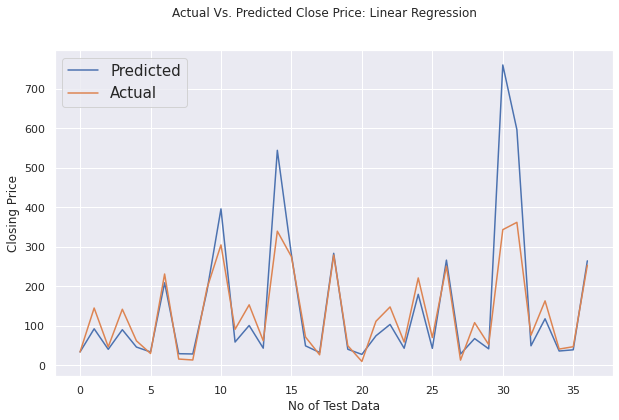

In [ ]:
#Actual vs Predicted 
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred))
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.show()